In [1]:
## Import libraries
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from IPython import display
import datetime
import time

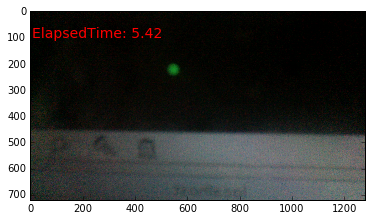

In [2]:
# webcam related class - iterators
class openwebcam:
    def __init__(self, seconds):
        self.vc = cv2.VideoCapture(0) #Open webcam 0:first camera, usually webcam on laptops
        self.seconds = seconds #Time to capture video
        self.starttime = datetime.datetime.now()
        
    def __iter__(self):
        self.elapsedtime = None
        return self
    
    def next(self):
        self.elapsedtime = (datetime.datetime.now() - self.starttime).total_seconds() # Count elapsed time
        self.plotfromwebcam()
        if self.elapsedtime > self.seconds: #Get out when enought time has passed
            raise StopIteration
        return self.elapsedtime
    
    def plotfromwebcam(self): #Maybe write this as a wrapper?
        if self.vc.isOpened(): 
            _, frame = self.vc.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            webcam_preview = plt.imshow(frame)  
            plt.text(5, 100, 'ElapsedTime: %0.2f' %self.elapsedtime, color='red', fontsize=14) #Display elapsed time
            plt.draw()            
            display.clear_output(wait=True) #Clears output of current cell, waits until next output
            display.display(plt.gcf())
            plt.close()
            
        else:
            raise Exception('The camera has gone missing.')

    def __exit__(self):
        self.vc.release()
        
for i in openwebcam(5):
    pass #do nothing

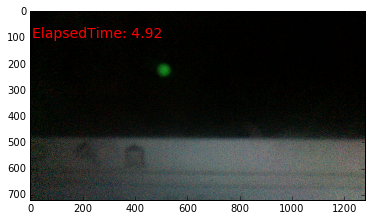

In [3]:
#Plot from webcam using yield
class VideoCaptureWrapper(object):
    def __init__(self, seconds):
        self.seconds = seconds #Time to capture video
        self.vc = cv2.VideoCapture(0) #Open webcam 0:first camera, usually webcam on laptops
    
    def generateplots(self):
        self.starttime =  datetime.datetime.now()
        self.elapsedtime = (datetime.datetime.now() - self.starttime).total_seconds() 
        while self.elapsedtime < self.seconds:
            yield self.plotfromwebcam()
            self.elapsedtime = (datetime.datetime.now() - self.starttime).total_seconds() # Count elapsed time
        self.vc.release()
        
    def plotfromwebcam(self): #Maybe write this as a wrapper?
        if self.vc.isOpened(): 
            _, frame = self.vc.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            webcam_preview = plt.imshow(frame)   
            plt.text(5, 100, 'ElapsedTime: %0.2f' %self.elapsedtime, color='red', fontsize=14) #Display elapsed time
            plt.draw()            
            display.clear_output(wait=True) #Clears output of current cell, waits until next output
            display.display(plt.gcf())
            plt.close()
        else:
            raise Exception('The camera has gone missing.')      
        
v = VideoCaptureWrapper(5)
for i in v.generateplots():
    pass #do nothing 